  ##**IMPORTING THE NECESSARY LIBRATIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix



**LOADING THE DATA SET **bold text**

In [ ]:
df=pd.read_csv('/content/bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [ ]:
df.info

<bound method DataFrame.info of                   area_type   availability                  location  ... bath balcony   price
0      Super built-up  Area         19-Dec  Electronic City Phase II  ...  2.0     1.0   39.07
1                Plot  Area  Ready To Move          Chikka Tirupathi  ...  5.0     3.0  120.00
2            Built-up  Area  Ready To Move               Uttarahalli  ...  2.0     3.0   62.00
3      Super built-up  Area  Ready To Move        Lingadheeranahalli  ...  3.0     1.0   95.00
4      Super built-up  Area  Ready To Move                  Kothanur  ...  2.0     1.0   51.00
...                     ...            ...                       ...  ...  ...     ...     ...
13315        Built-up  Area  Ready To Move                Whitefield  ...  4.0     0.0  231.00
13316  Super built-up  Area  Ready To Move             Richards Town  ...  5.0     NaN  400.00
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar  ...  2.0     1.0   60.00
13318  Super built-up  Area         18-Jun           Padmanabhanagar  ...  4.0     1.0  488.00
13319  Super built-up  Area  Ready To Move              Doddathoguru  ...  1.0     1.0   17.00

[13320 rows x 9 columns]>

In [ ]:
df.shape

(13320, 9)

||##**THE DESCRIPTIVE STATISTICS OF THE DATA**

In [ ]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


**CHEAKING THE  DATA FOR NULL VALUES**

In [ ]:
print(df.isnull().sum())

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


##**HANDLING MISSING VALUES**

In [ ]:
df['area_type'].replace('',np.nan,inplace=True)
df.dropna(subset=['area_type'] ,inplace=True)

<ipython-input-15-385e0f83a7a1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['area_type'].replace('',np.nan,inplace=True)


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.drop_duplicates()
df.shape

(13320, 9)

In [ ]:
df['availability'].replace('',np.nan,inplace=True)
df.dropna(subset=['availability'] ,inplace=True)

<ipython-input-18-e4a64d3f95a2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['availability'].replace('',np.nan,inplace=True)


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.drop_duplicates()
df.shape

(13320, 9)

In [ ]:
df['society'].replace('',np.nan,inplace=True)
df.dropna(subset=['society'] ,inplace=True)

<ipython-input-21-ad6564a77c6c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['society'].replace('',np.nan,inplace=True)


In [ ]:
df.shape

(7818, 9)

In [ ]:
df.drop_duplicates()
df.shape

(7818, 9)

In [ ]:
df['location'].replace('',np.nan,inplace=True)
df.dropna(subset=['location'] ,inplace=True)

<ipython-input-24-1387c5d4edfd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location'].replace('',np.nan,inplace=True)


In [ ]:
df.shape

(7817, 9)

In [ ]:
df.drop_duplicates()
df.shape

(7817, 9)

In [ ]:
df['size'].replace('',np.nan,inplace=True)
df.dropna(subset=['size'] ,inplace=True)

<ipython-input-27-1e0cf7d12d42>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['size'].replace('',np.nan,inplace=True)


In [ ]:
df.shape

(7804, 9)

In [ ]:
df.drop_duplicates()
df.shape

(7804, 9)

In [ ]:
df.bath.median()

2.0

In [ ]:
df['bath']=df['bath'].fillna(df['bath'].median())

In [ ]:
print(df['bath'].isnull().sum())


0


In [ ]:
df.balcony.median()

2.0

In [ ]:

df['balcony']=df['balcony'].fillna(df['balcony'].median())

In [ ]:
print(df['balcony'].isnull().sum())


0


In [ ]:

df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')




In [ ]:
median_total_sqft = df['total_sqft'].median()

In [ ]:
df['total_sqft'].fillna(median_total_sqft, inplace=True)
df

<ipython-input-38-10958f338d87>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_sqft'].fillna(median_total_sqft, inplace=True)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732.0,4.0,2.0,204.00
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345.0,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715.0,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00


In [ ]:
print(df['total_sqft'].isnull().sum())


0


In [ ]:
df.price.median()

70.0

In [ ]:
df['price']=df['price'].fillna(df['price'].median())

In [ ]:
print(df['price'].isnull().sum())


0


In [ ]:
print(df.isnull().sum())

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64


**DECTECTING AND REMOVAL OF OUTLIERS WITH Z-SCORE METHOD**

In [ ]:
def calculate_z_score(df, column):
  zscore = np.abs(stats.zscore(df[column]))
  return zscore

In [ ]:
def remove_outliers(df, column):
  zscore = calculate_z_score(df, column)
  df = df[(zscore < 3)]
  return df

In [ ]:
df=remove_outliers(df, 'bath')

In [ ]:
df=remove_outliers(df, 'balcony')

In [ ]:
df=remove_outliers(df, 'price')

In [ ]:
df=remove_outliers(df, 'total_sqft')

In [ ]:
df.shape

(7474, 9)

**REMOVING THE OUTLIERS FORM BATH**

In [ ]:
df['zscore']=(df.bath-df.bath.mean())/df.bath.std()
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,-0.516271
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,3.460313
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,0.809257
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,-0.516271
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732.0,4.0,2.0,204.00,2.134785


In [ ]:
df[df['zscore']>3]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.0,3.460313
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.0,3.460313
22,Plot Area,Ready To Move,Thanisandra,4 Bedroom,Soitya,2800.0,5.0,2.0,380.0,3.460313
84,Super built-up Area,Ready To Move,EPIP Zone,3 BHK,SJlynro,1499.0,5.0,2.0,102.0,3.460313
141,Super built-up Area,19-Dec,Yelahanka,5 BHK,LedorSa,3050.0,5.0,1.0,213.0,3.460313
...,...,...,...,...,...,...,...,...,...,...
12682,Super built-up Area,Ready To Move,Rajiv Nagar,4 BHK,PuoodSk,2340.0,5.0,1.0,160.0,3.460313
12959,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2665.0,5.0,3.0,125.0,3.460313
13268,Super built-up Area,18-Apr,EPIP Zone,4 BHK,BrontLa,3360.0,5.0,2.0,221.0,3.460313
13293,Super built-up Area,Ready To Move,Sarjapur Road,4 BHK,Puallhi,2425.0,5.0,1.0,195.0,3.460313


In [ ]:
df[df['zscore']<-3]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore


In [ ]:
df_without_outliers=df[(df.zscore>-3) &  (df.zscore<3)]
df_without_outliers

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,-0.516271
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,0.809257
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,-0.516271
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732.0,4.0,2.0,204.00,2.134785
12,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,Shncyes,1000.0,2.0,1.0,38.00,-0.516271
...,...,...,...,...,...,...,...,...,...,...
13309,Super built-up Area,Ready To Move,Yeshwanthpur,3 BHK,IBityin,1675.0,3.0,2.0,92.13,0.809257
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345.0,2.0,1.0,57.00,-0.516271
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715.0,3.0,3.0,112.00,0.809257
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,2.134785


In [ ]:
df.shape [0]-df_without_outliers.shape[0]

135

In [ ]:
df.shape

(7474, 10)

In [ ]:
df['zscore']=(df.total_sqft-df.total_sqft.mean())/df.total_sqft.std()
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,-0.730280
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,2.404676
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,0.213862
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,-0.498813
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732.0,4.0,2.0,204.00,2.672691


In [ ]:
df[df['zscore']>3]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
96,Plot Area,Ready To Move,Kengeri,4 Bedroom,Goardth,2894.0,4.0,1.0,245.0,3.001617
141,Super built-up Area,19-Dec,Yelahanka,5 BHK,LedorSa,3050.0,5.0,1.0,213.0,3.318362
259,Super built-up Area,Ready To Move,Coffee Board Layout,3 BHK,Calyxy,3045.0,3.0,2.0,170.0,3.308210
260,Plot Area,Ready To Move,Ambedkar Nagar,4 Bedroom,Thessrm,2900.0,3.0,2.0,300.0,3.013800
358,Super built-up Area,Ready To Move,Kodihalli,4 BHK,Soianal,3252.0,5.0,3.0,335.0,3.728505
...,...,...,...,...,...,...,...,...,...,...
12572,Super built-up Area,Ready To Move,Harlur,4 BHK,Shodsir,2990.0,4.0,1.0,225.0,3.196537
12711,Plot Area,Ready To Move,Ambedkar Nagar,3 Bedroom,Thessrm,2900.0,3.0,2.0,297.0,3.013800
12768,Built-up Area,18-Mar,Bettahalsoor,5 Bedroom,Toainnt,3210.0,2.0,2.0,353.0,3.643228
13268,Super built-up Area,18-Apr,EPIP Zone,4 BHK,BrontLa,3360.0,5.0,2.0,221.0,3.947789


In [ ]:
df[df['zscore']<-3]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore


In [ ]:
df_without_outliers=df[(df.zscore>-3) &  (df.zscore<3)]
df_without_outliers

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,-0.730280
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,2.404676
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,0.213862
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,-0.498813
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732.0,4.0,2.0,204.00,2.672691
...,...,...,...,...,...,...,...,...,...,...
13308,Built-up Area,Ready To Move,Bannerghatta Road,3 BHK,Baanise,1527.0,3.0,1.0,142.00,0.226044
13309,Super built-up Area,Ready To Move,Yeshwanthpur,3 BHK,IBityin,1675.0,3.0,2.0,92.13,0.526545
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345.0,2.0,1.0,57.00,-0.143491
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715.0,3.0,3.0,112.00,0.607762


In [ ]:
df.shape [0]-df_without_outliers.shape[0]

165

In [ ]:
df.shape

(7474, 10)

**REMOVING THE OUTLIERS FROM PRICE**

In [ ]:
df['zscore']=(df.price-df.price.mean())/df.price.std()

In [ ]:
df[df['zscore']>3]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.0,3.613010
18,Super built-up Area,Ready To Move,Ramakrishnappa Layout,3 BHK,PeBayle,2770.0,4.0,2.0,290.0,3.526747
22,Plot Area,Ready To Move,Thanisandra,4 Bedroom,Soitya,2800.0,5.0,2.0,380.0,5.079472
225,Super built-up Area,Ready To Move,Muthurayya Swamy Layout,3 BHK,MacleK,2405.0,4.0,2.0,260.0,3.009172
260,Plot Area,Ready To Move,Ambedkar Nagar,4 Bedroom,Thessrm,2900.0,3.0,2.0,300.0,3.699272
...,...,...,...,...,...,...,...,...,...,...
13007,Plot Area,Ready To Move,Sri Balaji Krupa Layout,4 Bedroom,KrodsNo,1750.0,4.0,2.0,263.0,3.060929
13040,Super built-up Area,21-Jul,Koramangala,3 BHK,G ceses,1605.0,3.0,2.0,260.0,3.009172
13057,Super built-up Area,Ready To Move,Cooke Town,3 BHK,Scenth,1600.0,3.0,2.0,260.0,3.009172
13089,Super built-up Area,Ready To Move,Malleshwaram,4 BHK,Apinaa,2610.0,4.0,2.0,306.0,3.802787


In [ ]:
df[df['zscore']<-3]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore


In [ ]:
df_without_outliers=df[(df.zscore>-3) &  (df.zscore<3)]
df_without_outliers

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,-0.802424
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,0.593821
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,0.162509
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,-0.820884
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732.0,4.0,2.0,204.00,2.043032
...,...,...,...,...,...,...,...,...,...,...
13309,Super built-up Area,Ready To Move,Yeshwanthpur,3 BHK,IBityin,1675.0,3.0,2.0,92.13,0.112994
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345.0,2.0,1.0,57.00,-0.493086
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715.0,3.0,3.0,112.00,0.455801
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,2.508849


In [ ]:
df.shape [0]-df_without_outliers.shape[0]

204

In [ ]:
df.shape

(7474, 10)

**REMOVING THE OUTLIERS FROM BALCONY**

In [ ]:
df['zscore']=(df.balcony-df.balcony.mean())/df.balcony.std()

In [ ]:
df[df['zscore']>3]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore


In [ ]:
df[df['zscore']<-3]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore


In [ ]:
df_without_outliers=df[(df.zscore>-3) &  (df.zscore<3)]
df_without_outliers

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,-0.828688
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,1.800181
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,-0.828688
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,-0.828688
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732.0,4.0,2.0,204.00,0.485746
...,...,...,...,...,...,...,...,...,...,...
13309,Super built-up Area,Ready To Move,Yeshwanthpur,3 BHK,IBityin,1675.0,3.0,2.0,92.13,0.485746
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345.0,2.0,1.0,57.00,-0.828688
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715.0,3.0,3.0,112.00,1.800181
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,-2.143123


In [ ]:
df.shape [0]-df_without_outliers.shape[0]

0

In [ ]:
df.shape

(7474, 10)

**APPLYING LABEL ENCODER TO THE CATEGORICAL VARIABLES**

In [ ]:
le = LabelEncoder()
df['area_type'] = le.fit_transform(df['area_type'])
df['availability'] = le.fit_transform(df['availability'])
df['location'] = le.fit_transform(df['location'])
df['size'] = le.fit_transform(df['size'])
df['society'] = le.fit_transform(df['society'])
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
0,3,37,205,2,447,1056.0,2.0,1.0,39.07,-0.828688
1,2,75,148,7,2355,2600.0,5.0,3.0,120.00,1.800181
3,3,75,382,4,2107,1521.0,3.0,1.0,95.00,-0.828688
5,3,75,620,2,585,1170.0,2.0,1.0,38.00,-0.828688
6,3,31,449,6,905,2732.0,4.0,2.0,204.00,0.485746


**SPLITING THE DATA SET INTO TRAINING AND TESTING SETS**

In [ ]:
x =df.drop(['price'],axis=1)
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x =df.drop('price',axis=1)


In [ ]:
y=df['price']
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
0,3,37,205,2,447,1056.0,2.0,1.0,39.07,-0.828688
1,2,75,148,7,2355,2600.0,5.0,3.0,120.00,1.800181
3,3,75,382,4,2107,1521.0,3.0,1.0,95.00,-0.828688
5,3,75,620,2,585,1170.0,2.0,1.0,38.00,-0.828688
6,3,31,449,6,905,2732.0,4.0,2.0,204.00,0.485746
...,...,...,...,...,...,...,...,...,...,...
13309,3,75,627,4,839,1675.0,3.0,2.0,92.13,0.485746
13313,3,75,585,4,102,1345.0,2.0,1.0,57.00,-0.828688
13314,3,75,230,4,2146,1715.0,3.0,3.0,112.00,1.800181
13315,0,75,620,9,200,3453.0,4.0,0.0,231.00,-2.143123


**CREATING A STANDARD SCALER OBEJET**

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)

In [ ]:
x_test_scaled = scaler.transform(x_test)

**BULIDING A RANDOM FOREST REGRESSOR MODEL**

In [ ]:
rf=RandomForestRegressor()
rf.fit(x_train_scaled,y_train)

RandomForestRegressor()

**MAKING PREDICTION ON THE TESTING SET**

In [ ]:
predicted_price = rf.predict(x_test_scaled)

**PRINTIHNG THE PREDICTED PRICE WITH THE ACTUAL PRICE**

In [ ]:
for i in range( len(y_test)):
  print (f' Actual price: { y_test.values[i] :.2f}, Predicted price: {predicted_price[i] :.2f}')

 Actual price: 100.00, Predicted price: 115.99
 Actual price: 17.54, Predicted price: 31.41
 Actual price: 116.00, Predicted price: 97.96
 Actual price: 34.20, Predicted price: 47.90
 Actual price: 125.00, Predicted price: 98.41
 Actual price: 46.50, Predicted price: 43.70
 Actual price: 145.00, Predicted price: 145.28
 Actual price: 42.60, Predicted price: 49.71
 Actual price: 39.00, Predicted price: 47.37
 Actual price: 253.00, Predicted price: 213.32
 Actual price: 80.00, Predicted price: 77.70
 Actual price: 140.00, Predicted price: 150.26
 Actual price: 69.00, Predicted price: 59.80
 Actual price: 73.17, Predicted price: 60.78
 Actual price: 55.00, Predicted price: 92.28
 Actual price: 64.08, Predicted price: 66.28
 Actual price: 100.00, Predicted price: 110.42
 Actual price: 50.00, Predicted price: 55.52
 Actual price: 29.50, Predicted price: 30.55
 Actual price: 50.00, Predicted price: 46.46
 Actual price: 37.00, Predicted price: 38.45
 Actual price: 110.00, Predicted price: 86.

**PRINTING THE MODEL_SCORE**

In [ ]:
model_score = rf.score(x_test_scaled, y_test)
print(f'model_score: {model_score:.2f}')

model_score: 0.81


**CALCULATING THE MEAN ABSOLUTE ERROR**

In [ ]:
mse = mean_squared_error(y_test, predicted_price)
print(f'mean squared error: {mse:.2f}')
mae = mean_absolute_error(y_test, predicted_price)
print(f'mean absolute error: {mae:.2f}')
r2 = r2_score(y_test, predicted_price)
print(f'r-squared score: {r2:.2f}')

mean squared error: 700.35
mean absolute error: 15.20
r-squared score: 0.81


**CREATING A CONFUSION MATRIX**

In [ ]:
cm = confusion_matrix(y_test.round(), predicted_price.round())
print(cm)

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


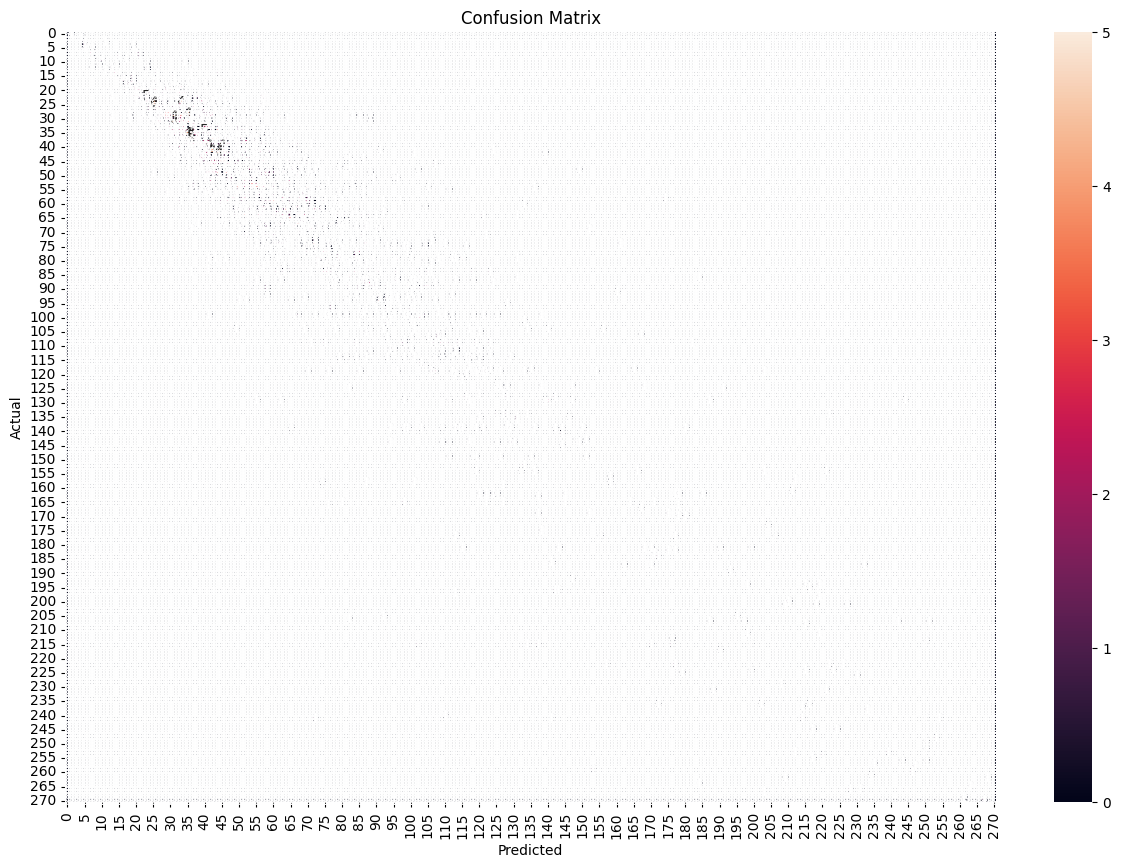

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

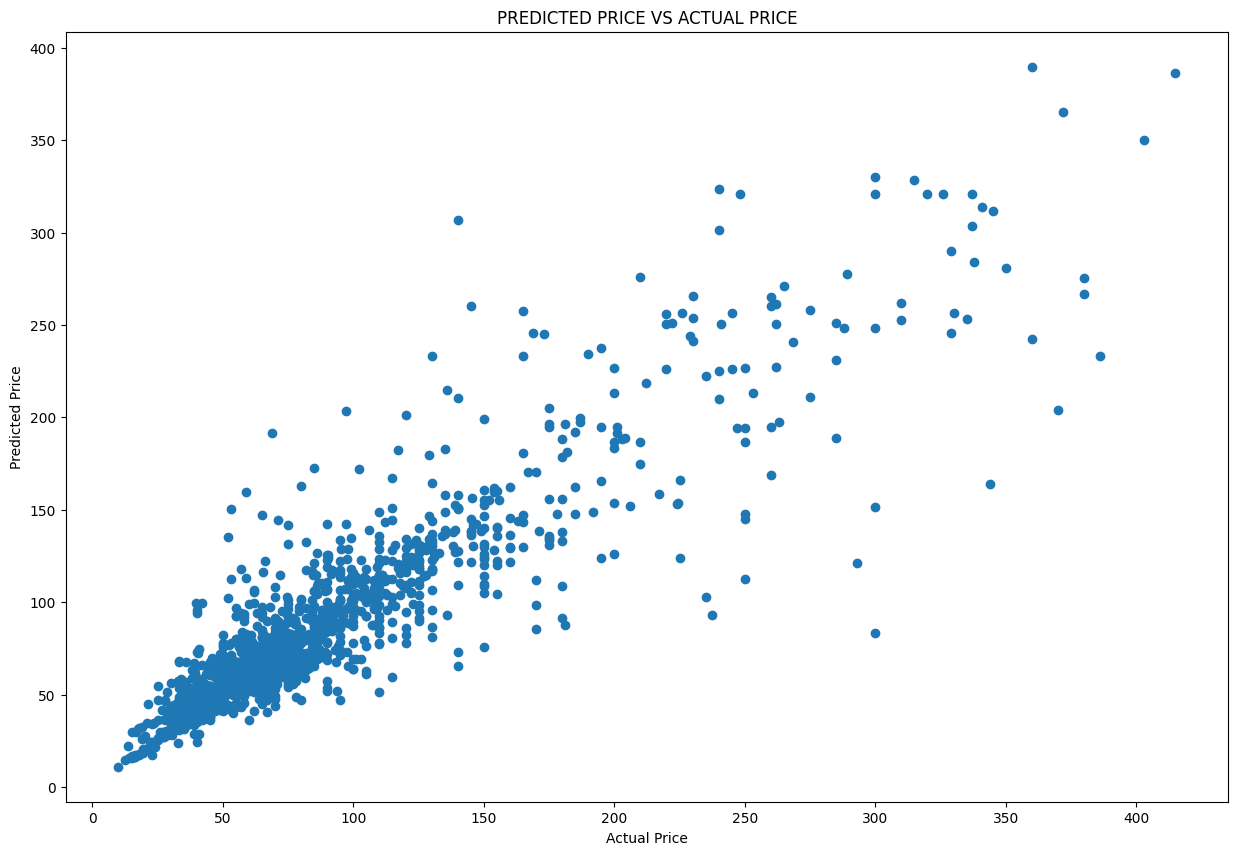

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(y_test, predicted_price)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('PREDICTED PRICE VS ACTUAL PRICE')
plt.show()